In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, precision_recall_curve, auc, classification_report, confusion_matrix
import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option("display.max_columns", None)
data = pd.read_csv('./creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Check basic information
data.info()

# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("Missing values:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Exploratory Data Analysis
# Basic statistics
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Class Distribution
class_counts = data['Class'].value_counts()
print(class_counts)

Class
0    284315
1       492
Name: count, dtype: int64


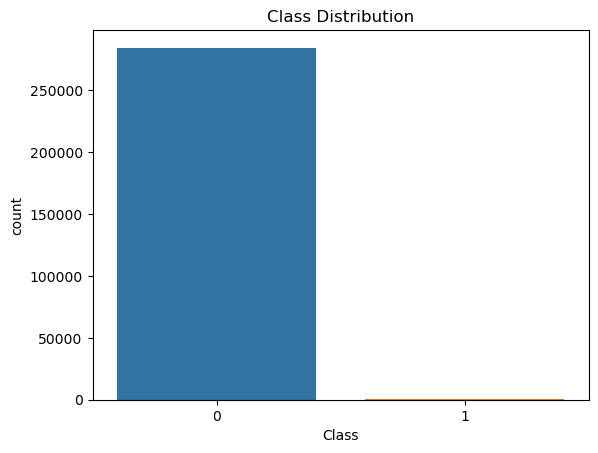

In [7]:
# Plot the class distribution
# Class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()

### Feature Distributions

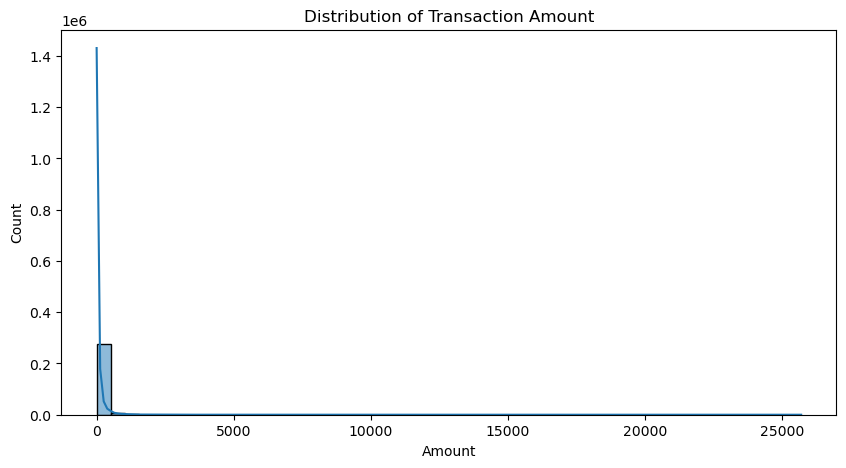

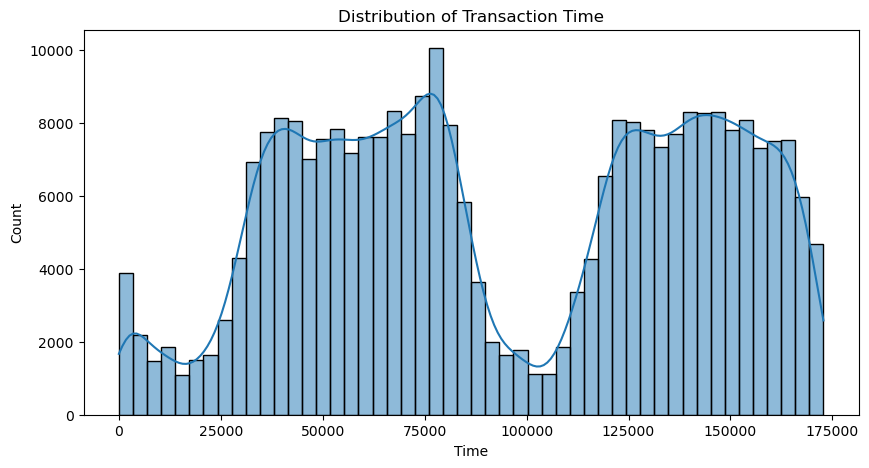

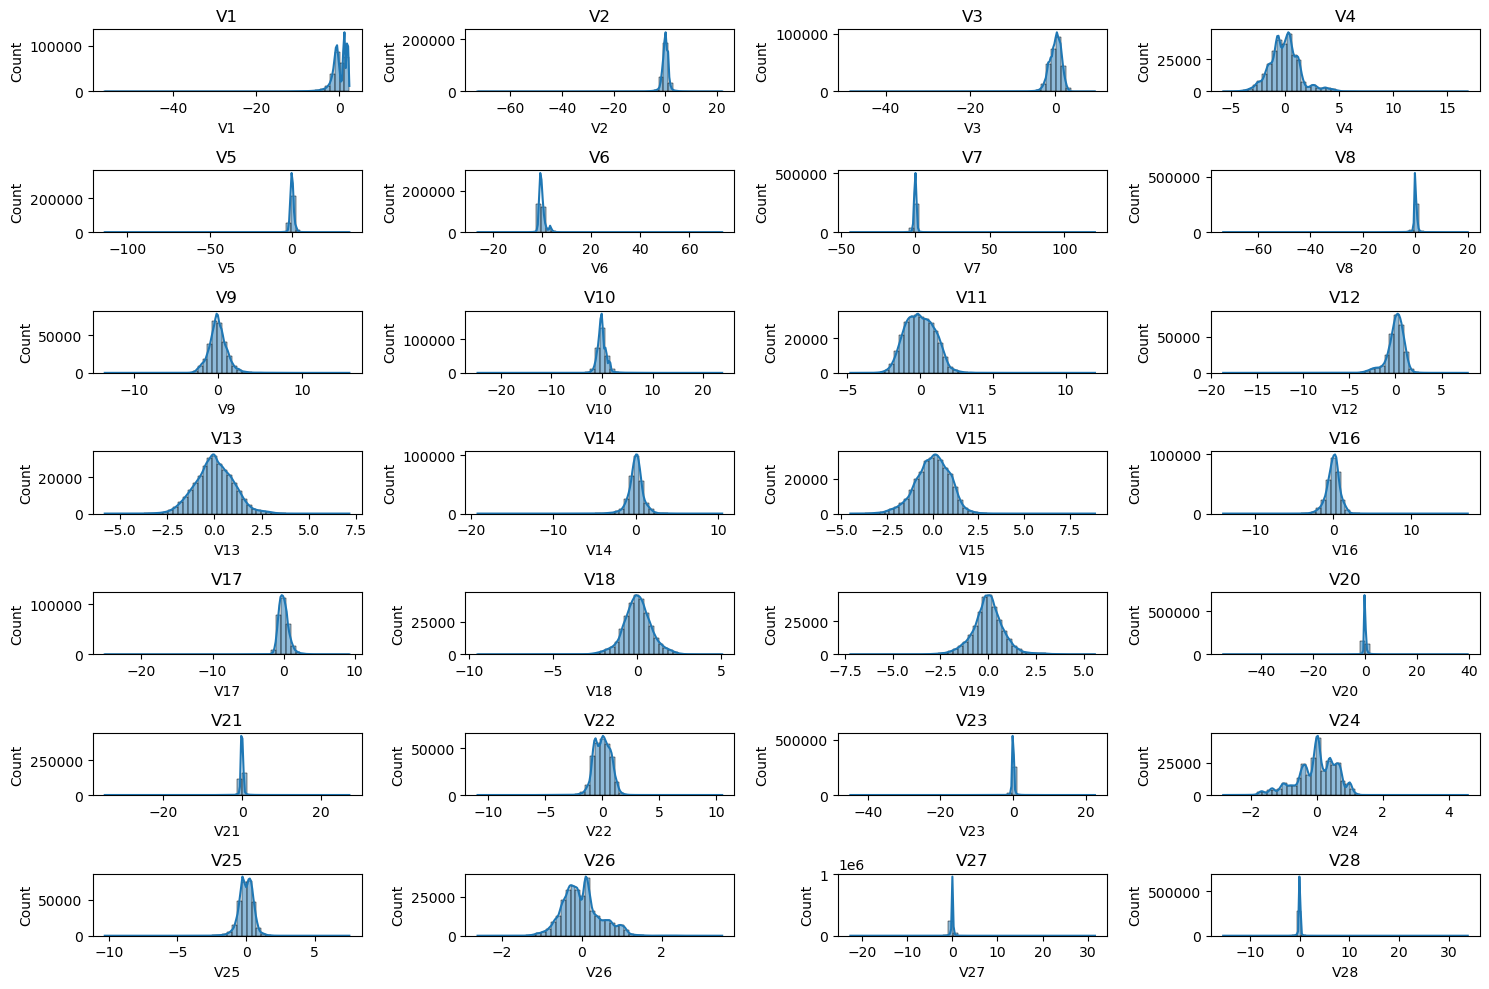

In [9]:
# Distribution of 'Amount' feature
plt.figure(figsize=(10, 5))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()

# Distribution of 'Time' feature
plt.figure(figsize=(10, 5))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Distribution of Transaction Time')
plt.show()

# Distribution of PCA features (V1 to V28)
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[1:29], 1):
    plt.subplot(7, 4, i)
    sns.histplot(data[col], bins=50, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

### Correlation Analysis

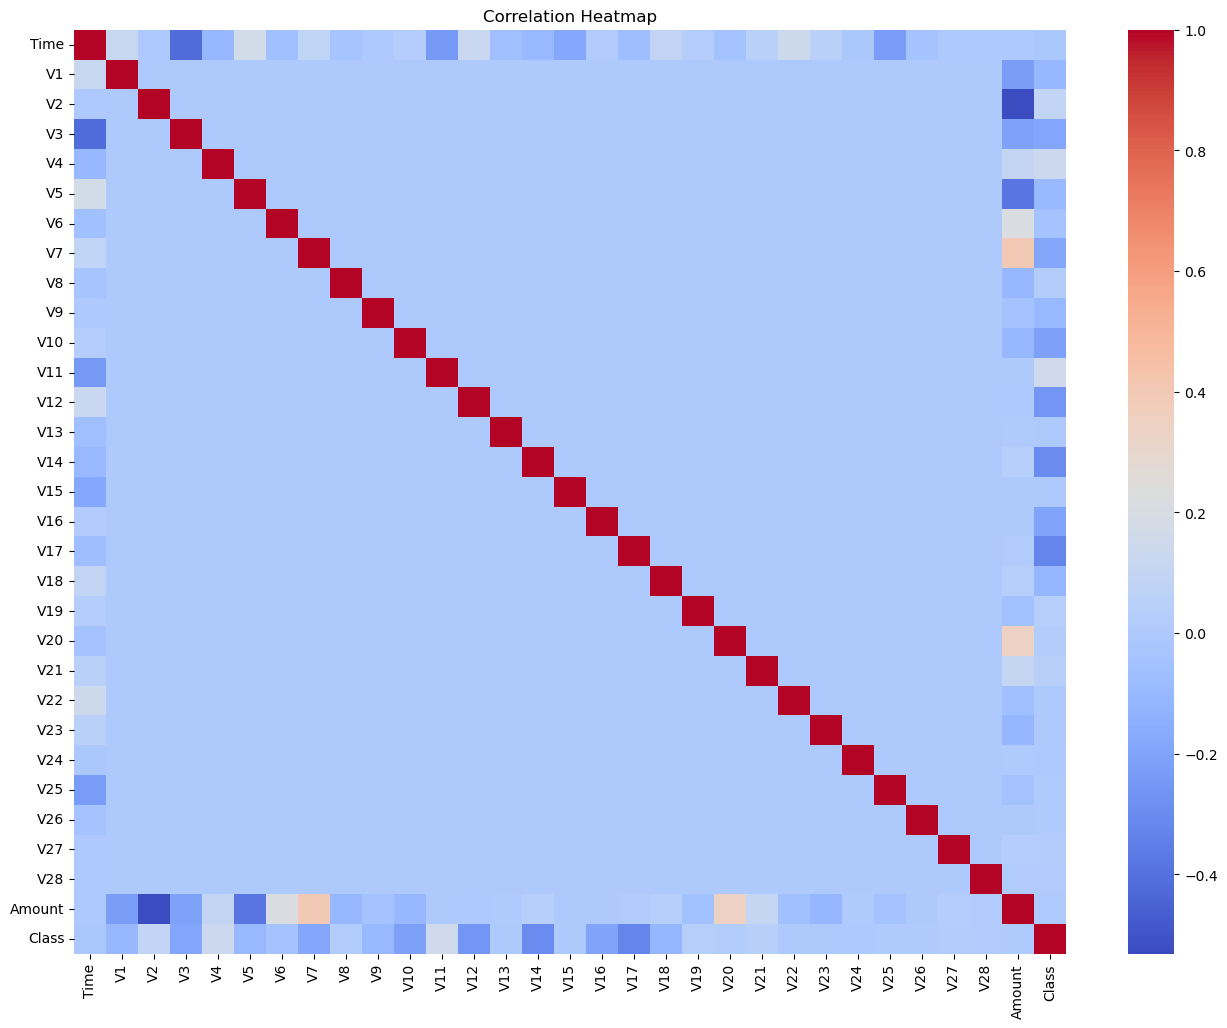

In [11]:
# Correlation Heatmap
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

As expected, there is no notable correlation between features V1-V28. However, certain correlations exist between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

Now, let's visualize the correlated and inverse-correlated values on the same graph. This will provide a clear picture of the relationships between the features.

Let's start with the directly correlated values: {V20; Amount} and {V7; Amount}.

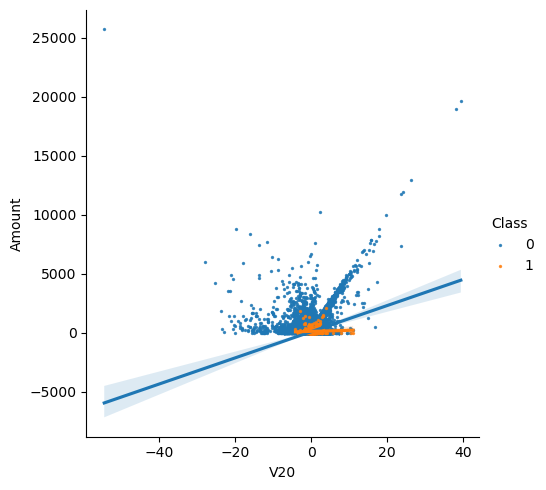

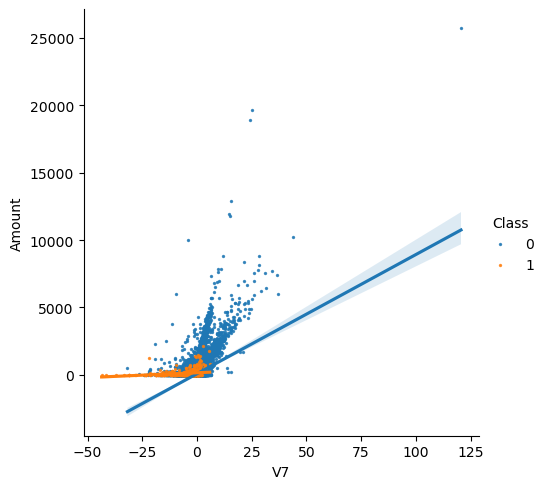

In [13]:
s = sns.lmplot(x='V20', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two pairs of features are correlated (the regression line for Class = 0 has a positive slope, while the regression line for Class = 1 has a smaller positive slope).

Let's plot now the inverse correlated values.

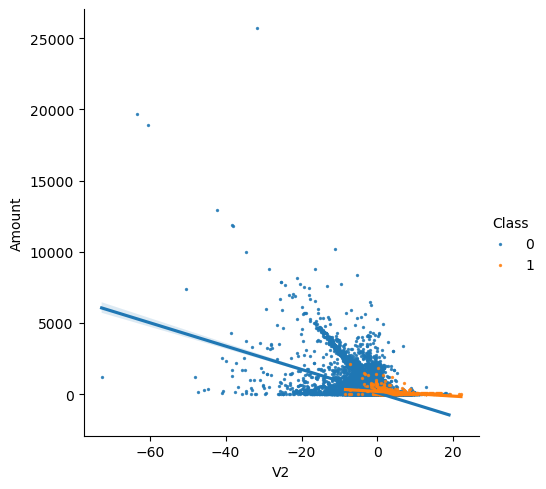

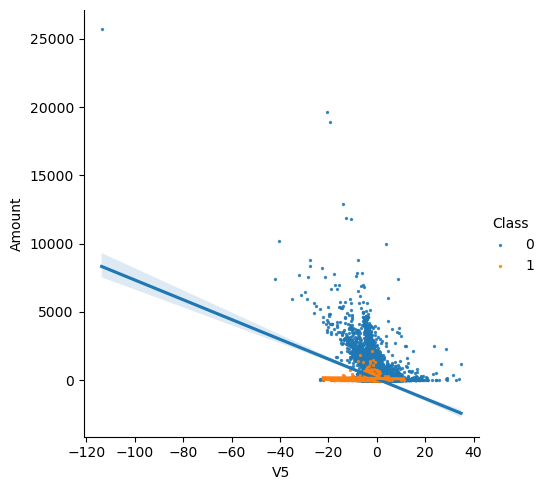

In [15]:
s = sns.lmplot(x='V2', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=data, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are inversely correlated (the regression line for Class = 0 has a negative slope, while the regression line for Class = 1 has a very small negative slope).

### Observations from EDA

1. Basic Information and Missing Values:
    - The dataset has 284,807 entries with 31 columns.
    - No missing values in the dataset.
    - The dataset contains 30 features (V1 to V28, Time, and Amount) and a target variable (Class).
2.	Class Distribution:
    - The dataset is highly imbalanced, with only 0.172% of transactions being fraudulent.
3.	Feature Distributions:
    - The Amount feature has a right-skewed distribution.
    - The Time feature shows transactions over a period, which can be further analysed for time-based patterns.
    - PCA components (V1 to V28) vary in their distribution, indicating varied transformations from the original features.
4.	Correlation Analysis:
    - The correlation matrix shows that most features have a low correlation with each other, indicating minimal multicollinearity.

### Data Preprocessing and Preparation

1.	Handling Imbalanced Data:
    - We will use SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalance.
2.	Feature Scaling:
    - We will scale the Amount and Time features using StandardScaler as they are not scaled.
3.	Train-Test Split:
    - We will split the data into training and testing sets.

Let’s proceed with these steps.

### Step 1: Handling Imbalanced Data with SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

# Separating the input features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Applying SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Step 2: Feature Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

# Scaling 'Amount' and 'Time' features
scaler = StandardScaler()

X_train_resampled[['Amount', 'Time']] = scaler.fit_transform(X_train_resampled[['Amount', 'Time']])
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

In [23]:
# Standardize the 'Amount' and 'Time' features
scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])

### Step 3: Model Training and Evaluation

We will use XGBoost for this task and perform hyperparameter tuning using RandomizedSearchCV.

In [25]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, precision_recall_curve, auc

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=20, scoring='average_precision', cv=3, verbose=1, random_state=42)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Best model
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'])

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

print("Classification Report:\n", report)
print("Area Under the Precision-Recall Curve (AUPRC):", pr_auc)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Classification Report:
               precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85295
       Fraud       0.83      0.80      0.81       148

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Area Under the Precision-Recall Curve (AUPRC): 0.8143171620287079


### Handling Imbalanced Data with Class Weights

In [27]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=[0, 1], y=y_train)
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}

# Initialize the XGBoost classifier with class weights
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=class_weights_dict[1])

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [2, 3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=20, scoring='average_precision', cv=3, verbose=1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'])

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

print("Classification Report:\n", report)
print("Area Under the Precision-Recall Curve (AUPRC):", pr_auc)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Classification Report:
               precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85295
       Fraud       0.80      0.79      0.80       148

    accuracy                           1.00     85443
   macro avg       0.90      0.90      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Area Under the Precision-Recall Curve (AUPRC): 0.7961366092651525


### Model Training without Features Scaling and Data Imbalance Handling

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [30]:
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300, 2000],
    'max_depth': [2, 3, 5, 7],
    'subsample': [0.6, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.8, 0.9, 1.0]
}

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid, n_iter=20, scoring='average_precision', n_jobs=-1, cv=5, verbose=1)
random_search.fit(X_train, y_train)

# Best model
best_model = random_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Classification report
report = classification_report(y_test, y_pred, target_names=['Non-Fraud', 'Fraud'])

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

print("Classification Report:\n", report)
print("Area Under the Precision-Recall Curve (AUPRC):", pr_auc)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Classification Report:
               precision    recall  f1-score   support

   Non-Fraud       1.00      1.00      1.00     85295
       Fraud       0.94      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Area Under the Precision-Recall Curve (AUPRC): 0.8491772804327924


### Train XGBoost with KFold Cross-validation

Fold 1, Best Parameters: {'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': 0.8, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.1, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 7, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 300, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': 0.9, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
Fold 1, AUPRC: 0.8854216138932034
Fold 2, Best Parameters: {'objective': 'binary:log

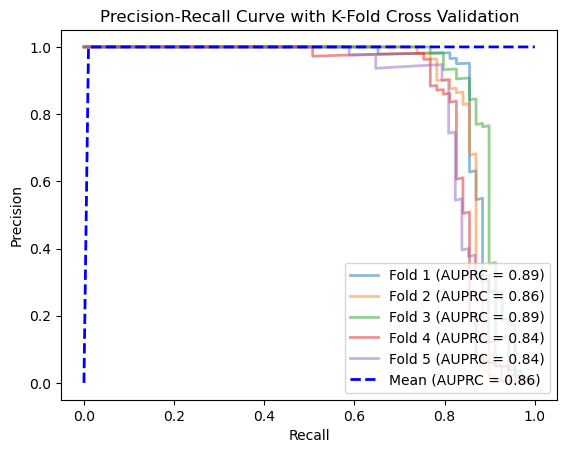

In [32]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import average_precision_score, precision_recall_curve, auc
import numpy as np
# Define parameter grid
params = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize variables for cross-validation results
auprcs = []
mean_precision = 0.0
mean_recall = np.linspace(0, 1, 100)

# Stratified K-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    
    # Apply SMOTE to handle class imbalance
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_fold, y_train_fold)
    
    # Create XGBoost model
    xgb_model = xgb.XGBClassifier(random_state=42)

    # Random search with cross-validation within the fold
    random_search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=10, scoring='average_precision', n_jobs=-1, cv=3, verbose=0)
    random_search.fit(X_train_resampled, y_train_resampled)

    # Best model
    best_xgb = random_search.best_estimator_
    print(f'Fold {fold + 1}, Best Parameters: {best_xgb.get_params()}')

    # Predictions on the test set for this fold
    y_prob = best_xgb.predict_proba(X_test_fold)[:, 1]  # Probability of fraud

    # Calculate AUPRC for this fold
    auprc = average_precision_score(y_test_fold, y_prob)
    auprcs.append(auprc)
    print(f'Fold {fold + 1}, AUPRC: {auprc}')

    # Precision-Recall Curve for this fold
    precision, recall, _ = precision_recall_curve(y_test_fold, y_prob)
    mean_precision += np.interp(mean_recall, recall, precision) / kf.n_splits
    plt.plot(recall, precision, lw=2, alpha=0.5, label=f'Fold {fold + 1} (AUPRC = {auprc:.2f})')

# Average Precision-Recall Curve
mean_precision[0] = 0.0
plt.plot(mean_recall, mean_precision, color='blue', linestyle='--', linewidth=2, label='Mean (AUPRC = {0:0.2f})'.format(np.mean(auprcs)))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with K-Fold Cross Validation')
plt.legend(loc="lower right")
plt.show()